In [210]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
df = pd.read_csv("./capturequic_c_pcap.csv", sep='@')
cond_s = df['ip.src'] == '192.168.1.78'
df_s = df[cond_s]
cond_c = df['ip.src'] == '192.168.1.79'
df_c  = df[cond_c]
# frame_type == 3：ACK for STREAM
cond_ack = df_s['quic.frame_type'].str.contains('3', na=False)
df_s_ack = df_s[cond_ack]
df_s_ack[:5]

,frame.number,quic.packet_number,frame.time,frame.time_epoch,frame.len,quic.frame_type,_ws.col.Protocol,ip.proto,ip.len,ip.src,ip.dst,udp.length,udp.srcport,udp.dstport,udp.payload,quic.stream_data,_ws.col.Info,quic.ack.largest_acknowledged,quic.ack.ack_delay
9,10,1,"Nov 13, 2023 13:53:49.931825000 CST",1.699855e+09,301,"3,7,30,6",QUIC,17,287,192.168.1.78,192.168.1.79,267,4242,61536,4a591ad891553d17f79986418d11fd1394d1c7fd6027d0...,NaN,"Protected Payload (KP0), PKN: 1, ACK_ECN, NT, ...",2.0,50.0
16,17,3,"Nov 13, 2023 13:53:50.717604000 CST",1.699855e+09,73,3,QUIC,17,59,192.168.1.78,192.168.1.79,39,4242,61536,43b570ee7588fa6a1a2531c9bfa5209b59a34bf449af25...,NaN,"Protected Payload (KP0), PKN: 3, ACK_ECN",10.0,11.0
18,19,4,"Nov 13, 2023 13:53:51.060856000 CST",1.699855e+09,74,3,QUIC,17,60,192.168.1.78,192.168.1.79,40,4242,61536,428c4702f53cd438b12bf687bf64f08864f5af3d5c6121...,NaN,"Protected Payload (KP0), PKN: 4, ACK_ECN",11.0,3158.0
20,21,5,"Nov 13, 2023 13:53:51.564969000 CST",1.699855e+09,74,3,QUIC,17,60,192.168.1.78,192.168.1.79,40,4242,61536,52a372cc15796db36842b578c9cdd18dd09cf1e0b32c94...,NaN,"Protected Payload (KP0), PKN: 5, ACK_ECN",12.0,3188.0
22,23,6,"Nov 13, 2023 13:53:52.014363000 CST",1.699855e+09,74,3,QUIC,17,60,192.168.1.78,192.168.1.79,40,4242,61536,4f1068204e994f465a9944c277827bc1ebdabf9e7fd024...,NaN,"Protected Payload (KP0), PKN: 6, ACK_ECN",13.0,3170.0


In [225]:
# Create an empty list to hold the results
rows = []

delete_row = []

for i in df_s_ack.index:
    n = df.iloc[i]['quic.ack.largest_acknowledged']
    idx = int(n)
    filtered_data = df_c[df_c['quic.packet_number'] == str(idx)]
    filtered_data = filtered_data[filtered_data['quic.frame_type'].str.contains('12', na=False)]
    if filtered_data[filtered_data['quic.frame_type'].str.contains('12', na=False)].empty == True:
        df_s_ack = df_s_ack.drop(i)
        print(i, "HI")
        continue
    rows.append(filtered_data)

# Now concatenate the rows to create the resulting DataFrame
df_c_stream = pd.concat(rows) # Transpose the DataFrame if needed

df_c_stream[:60]
# df_s_ack[:5]

,frame.number,quic.packet_number,frame.time,frame.time_epoch,frame.len,quic.frame_type,_ws.col.Protocol,ip.proto,ip.len,ip.src,ip.dst,udp.length,udp.srcport,udp.dstport,udp.payload,quic.stream_data,_ws.col.Info,quic.ack.largest_acknowledged,quic.ack.ack_delay
15,16,10,"Nov 13, 2023 13:53:50.555959000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,5e4c9c01098b9ee9a73ea9963f9616d7550f88aa6a9873...,000425d401df5e766551b9ee197c23b0912a5264515a4e...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 1...",NaN,NaN
17,18,11,"Nov 13, 2023 13:53:50.928383000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,574c9c0109c789fa974c69f75a7b5265e8eafcaa5b57de...,000425d401df5e766551b9ee374edbf8317f4b64d680af...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 1...",NaN,NaN
19,20,12,"Nov 13, 2023 13:53:51.428618000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,424c9c010951d6f15403172458b4713298af8278cdb3a6...,000425d401df5e766551b9ef19857a502bc1439fd4d4aa...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 1...",NaN,NaN
21,22,13,"Nov 13, 2023 13:53:51.928943000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,414c9c01099669ffc91120478a57e0121d85656ab209b7...,000425d401df5e766551b9ef375822f8b1975a3c1c405c...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 1...",NaN,NaN
23,24,14,"Nov 13, 2023 13:53:52.429186000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,434c9c01093ee143a8a60ab23c8b095f96e6d7c7749b19...,000425d401df5e766551b9f0198f80b87e9aab67546689...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 1...",NaN,NaN
27,28,18,"Nov 13, 2023 13:53:53.241420000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,434c9c01091e25d0429f03ccd634c83d302cfd4a5a876c...,000425d401df5e766551b9f0376267e03ea89043203379...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 1...",NaN,NaN
28,29,19,"Nov 13, 2023 13:53:53.430044000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,4c4c9c0109333c5c7c0a4af4a2c9862428868089f3aaf8...,000425d401df5e766551b9f1199af268870d98abb8aa93...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 1...",NaN,NaN
31,32,20,"Nov 13, 2023 13:53:53.930403000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,584c9c010937976c583d23ba9a537d35f44a793e0c8fef...,000425d401df5e766551b9f1376f19e059935122d56103...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 2...",NaN,NaN
33,34,21,"Nov 13, 2023 13:53:54.430922000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,574c9c0109508d44995078caa5bab347a2cb74704c2011...,000425d401df5e766551b9f219a9754011b7061387dd51...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 2...",NaN,NaN
35,36,22,"Nov 13, 2023 13:53:54.931560000 CST",1.699855e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,61536,4242,594c9c0109345b724a2b374b9e9aec96dda2b965c678b3...,000425d401df5e766551b9f2378040802de2a40e0fb3a5...,"Protected Payload (KP0), DCID=4c9c0109, PKN: 2...",NaN,NaN


In [213]:
print(df_s_ack.index)
print(len(df_s_ack))

Index([ 16,  18,  20,  22,  24,  29,  30,  32,  34,  36,
       ...
       270, 272, 274, 276, 278, 282, 284, 286, 288, 290],
      dtype='int64', length=119)
119


In [214]:
df['quic.frame_type'].iloc[12]

'12'

In [215]:
if len(df_s_ack) != len(df_c_stream):
    print("length not match", len(df_s_ack), len(df_c_stream))
for i in range(len(df_s_ack)):
    if int(df_c_stream['quic.packet_number'].iloc[i]) != int(df_s_ack['quic.ack.largest_acknowledged'].iloc[i]):
        print("packet not match!", df_c_stream['quic.packet_number'].iloc[i], int(df_s_ack['quic.ack.largest_acknowledged'].iloc[i]))
print("check done!")

check done!


## Calculate Round-Trip-Time
1. send time - receive time
2. Show it as an IQR

In [216]:
rtt_list = []
for i in range(len(df_s_ack)):
    rtt_list.append((df_s_ack['frame.time_epoch'].iloc[i] - df_c_stream['frame.time_epoch'].iloc[i] - df_s_ack['quic.ack.ack_delay'].iloc[i] / 1000000))

In [217]:
stdev = statistics.stdev(rtt_list)
mean = statistics.mean(rtt_list)
median = statistics.median(rtt_list)
print("standard deviation:", stdev)
print("mean:", mean)
print("median:", median)

standard deviation: 0.07186182863367699
mean: 0.12407664939149488
median: 0.11566392605590821


In [218]:
q1, q3 = np.percentile(rtt_list, [25, 75])
iqr = q3 - q1

lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

print(q1, q3, iqr, lower_fence, higher_fence)

0.07700694957733155 0.1594009104385376 0.08239396086120605 -0.04658399171447754 0.2829918517303467


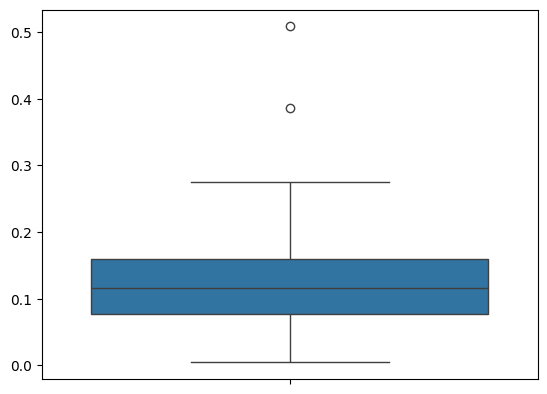

In [219]:
sns.boxplot(rtt_list)
plt.show()

## Re-Transmission

In [222]:
print(len(df_c_stream))

119


In [221]:
x = df_c_stream['quic.stream_data'].iloc[0]
t = int(x[16:24], 16)
usec = int(x[24:32], 16)
# seq = int(x[32:40], 16)
print(t, usec)

1699854830 427566000


In [226]:
tList = []
usecList = []
t = 0
usec = 0
for i in range(len(df_c_stream)):
    idx = df_c_stream['quic.packet_number'].iloc[i]
    x = df_c_stream['quic.stream_data'].iloc[i]
    t = int(x[16:24], 16)
    usec = int(x[24:32], 16)
    tList.append(t)
    usecList.append(usec)
    print(idx, t, usec)

10 1699854830 427566000
11 1699854830 927915000
12 1699854831 428178000
13 1699854831 928523000
14 1699854832 428835000
18 1699854832 929196000
19 1699854833 429585000
20 1699854833 930028000
21 1699854834 430536000
22 1699854834 931152000
23 1699854835 431843000
24 1699854835 932561000
25 1699854836 433474000
26 1699854836 934476000
27 1699854837 435551000
28 1699854837 936770000
29 1699854838 437934000
30 1699854838 938760000
31 1699854839 439940000
32 1699854839 941125000
35 1699854840 441507000
37 1699854840 942736000
39 1699854841 443874000
40 1699854841 945068000
41 1699854842 446295000
42 1699854842 947542000
43 1699854843 448712000
44 1699854843 949900000
48 1699854844 451063000
49 1699854844 952230000
50 1699854845 453381000
51 1699854845 954550000
52 1699854846 455731000
53 1699854846 956982000
54 1699854847 458152000
55 1699854847 959330000
56 1699854848 460539000
57 1699854848 961693000
58 1699854849 462865000
59 1699854849 964124000
62 1699854850 464703000
63 1699854850 96